In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('champagne.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ’64-’72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ’64-’72
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [6]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [7]:
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [9]:
df.set_index('Month', inplace=True)

In [10]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [11]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


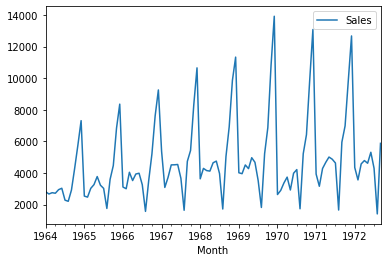

In [12]:
df.plot()

In [15]:
#test seasonality using dickeyfuller test
from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['Sales'])

In [22]:
#H0= Data is non-stationary
#H1= Data is sationary
def adfuller_test(sales):
    result= adfuller(sales)
    labels=['ADF Test Statistics','p-value','#Lags used','Number of Observations used']
    for value,label in zip(result,labels): #zip nwans combining values
        print(label+':'+str(value))
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis HO, reject the null hypothesis. Data has seasonality")
    else:
        print("Weak evidence against null hypothesis HO, cannot reject the null hypothesis. Data has no seasonality")
        

In [23]:
adfuller_test(df['Sales'])

ADF Test Statistics:-1.8335930563276297
p-value:0.3639157716602417
#Lags used:11
Number of Observations used:93
Weak evidence against null hypothesis HO, cannot reject the null hypothesis. Data has no seasonality


In [24]:
#Differencing
df['Sales First Difference'] = df['Sales']-df["Sales"].shift(12)

In [25]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN


In [27]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistics:-7.626619157213163
p-value:2.060579696813685e-11
#Lags used:0
Number of Observations used:92
Strong evidence against null hypothesis HO, reject the null hypothesis. Data has seasonality


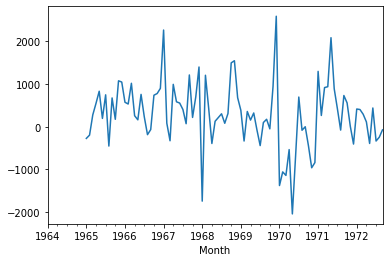

In [28]:
df['Sales First Difference'].plot()

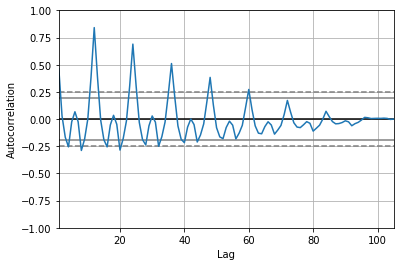

In [32]:
#AutoRegressive Model
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

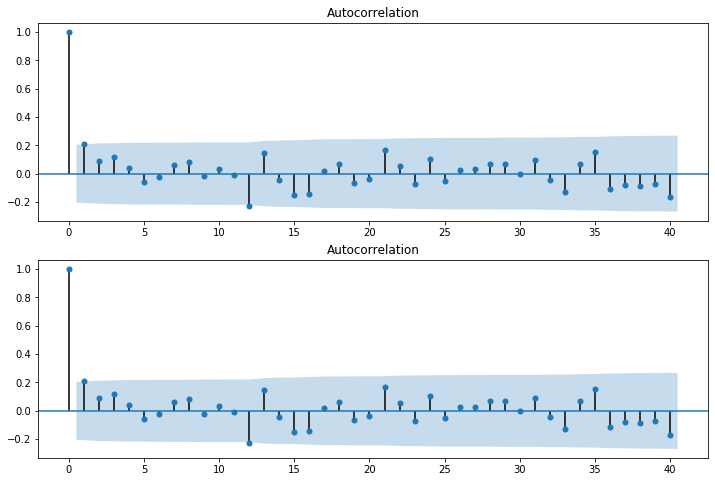

In [40]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_acf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax2)

In [41]:
#For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [42]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit= model.fit()

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 13 Sep 2020   AIC                           1910.251
Time:                        12:03:09   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7829     12.405      1.837      0.069      -1.531      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

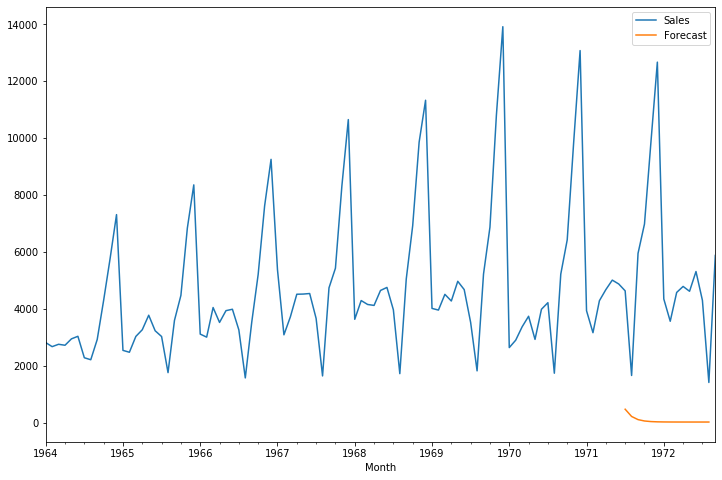

In [46]:
df['Forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))

In [49]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


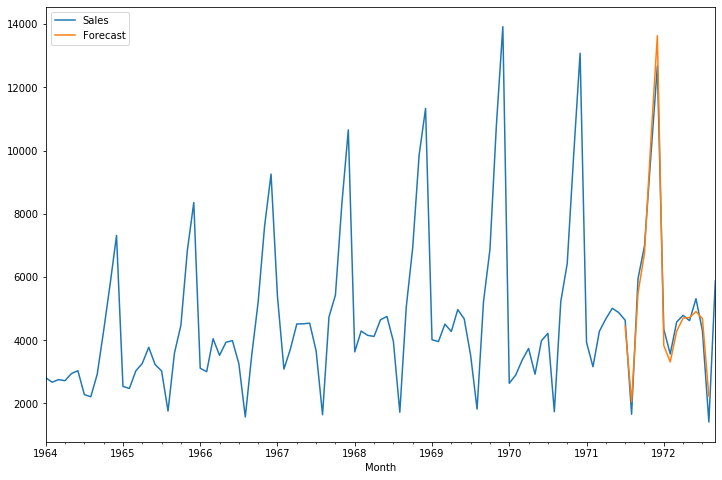

In [50]:
df['Forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))

In [51]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [53]:
future_dateset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [54]:
future_dateset_df.tail()

,Sales,Sales First Difference,Forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [56]:
future_df=pd.concat([df,future_dateset_df])

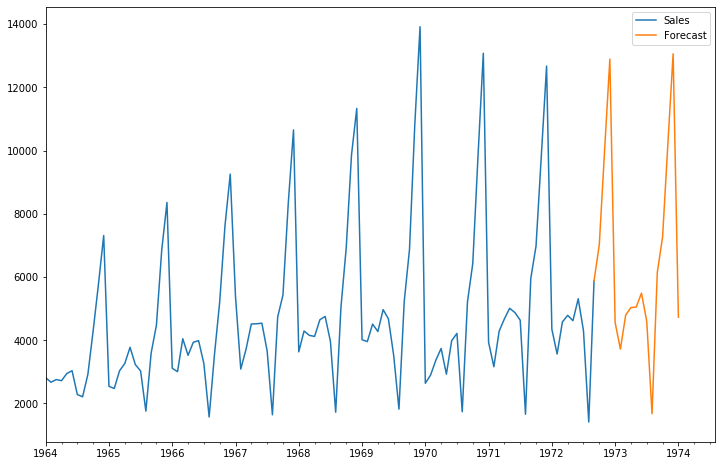

In [58]:
future_df['Forecast']=results.predict(start=104,end=120,dynamic=True)
future_df[['Sales','Forecast']].plot(figsize=(12,8))